### Prinicpal Component Analysis (PCA) on MNIST

Principal Component Analysis (PCA) is a dimensionality reduction technique that can be used to significantly speed up your unsupervised feature learning algorithm. In machine learning applications, PCA  is often used to simplify complex datasets by identifying the most importatnt features that explain the majority of the variance in the data, in addition, it is used to speed up the learning algorithm (because less features lead to faster training) and to visualise high-dimensional data (by projecting it onto a lower dimensional surface).

In this tutorial, we will explore how to perform PCA on the MNIST dataset. Which is a dataset of handwritten digits. We will walk through the steps of loading the dataset, standardizing the data, creating a PCA instance, fitting it to the data, transforming the data into data lower-dimensional space, and plotting the results. 

We will use the PCA to reduce the dimensionality of the dataset from 784 to lower dimensions and then plot the results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from datasets import load_dataset

We will import and downlaod the MNIST dataset from HuggingFace datasets library. We will use the `load_dataset` function to load the dataset.

In [3]:
mnist_ds = load_dataset('mnist')

image_list = mnist_ds.get('train')['image']

Found cached dataset mnist (/home/hkhdair/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332)
100%|██████████| 2/2 [00:00<00:00, 20.97it/s]


The image list is a list of PNG image files.

In [4]:
type(image_list[1])

PIL.PngImagePlugin.PngImageFile

Let's have a look at one of the images in the list.

In [5]:
image_list[1]

Let's convert the image to a numpy array. We will use the `np.array` function to convert the image to a numpy array. The resulting numpy arrays are then stacked into a single numpy array using the `np.stack` function to create a 3D array of shape (num_images, height, width).

In [6]:
# Convert the list of PIL images to a numpy array
image_array = np.stack([np.array(img) for img in image_list])

# Check the shape of the array
print(image_array.shape)

(60000, 28, 28)


Let's have a look at one of the images in the new created numpy array.

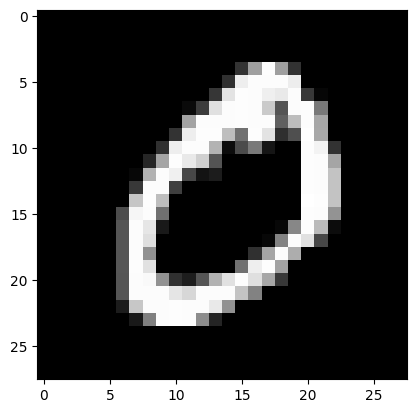

In [7]:
# import matplotlib.pyplot as plt
plt.imshow(image_array[1], cmap='gray')
plt.show()

Now, we can load the label from the downloaded dataset, and we will convert the labels to a numpy array, using the `np.asarray` function.

(np.array vs np.asarray) : The main difference between `np.array` and `np.asarray` is that `np.array` is used to create a copy of the array passed as input, whereas `np.asarray` is used to create a view of the array passed as input.

Let's have a look at the labels shape.

In [19]:
labels= mnist_ds.get('train')['label']
y = np.asarray(labels)
y.shape

(60000,)

In [11]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

We need to reshape the labels to be a 1D array, using the `np.reshape` function. We need this step because we will use standard scaler to standardize the which accepts arrays of shape (num_images, num_features).

In [12]:
reshaped_array = image_array.reshape(60000, 28*28)
reshaped_array.shape

(60000, 784)

Each image is of 784 dimensions.

In [13]:
reshaped_array[1].shape

(784,)

In [14]:
# Standardize the data (optional but recommended):
scaler = StandardScaler()
scaled_X = scaler.fit_transform(reshaped_array)

As said earlier, each image is of 784 dimensions, which is a lot of features. We will use PCA to reduce the dimensionality of the dataset from 784 to a lower dimension that we will be decided based on the explained variance ratio.

We will create a PCA instance, using the `PCA` function from the `sklearn.decomposition` module. We will set the `n_components` parameter to the variance ratio that we want to keep, in this case we will set it to 0.95, which means that we want to keep 95% of the variance.



In [15]:
# Create a PCA instance and fit it to the standardized data:
# You can choose the number of principal components or the proportion of variance to preserve
n_components = 0.95  # 95% of the total variance

pca = PCA(n_components=n_components)
pca.fit(scaled_X)

PCA(n_components=0.95)

Transform the data using the fitted PCA instance.

In [16]:
# Transform the data using the fitted PCA:
transformed_X = pca.transform(scaled_X)

Now, let's see the shape of the transformed data.

In [ ]:
transformed_X.shape

(60000, 331)

Great! The data is now of shape (num_images, 331), which means that the dimensionality of the dataset has been reduced from 784 to 331 features.

We can have a look at the results of the PCA performed on the dataset.

pca.n_components_ : The number of components in the fitted PCA instance.
pca.explained_variance_ratio_ : The variance ratio of each component in the fitted PCA instance.

In [17]:
# Analyze the results:
print("Number of principal components:", pca.n_components_)
print("Total variance explained by these components:", np.sum(pca.explained_variance_ratio_))

Number of principal components: 331
Total variance explained by these components: 0.9502951572319136


Visualize the first two principal components, as follows:

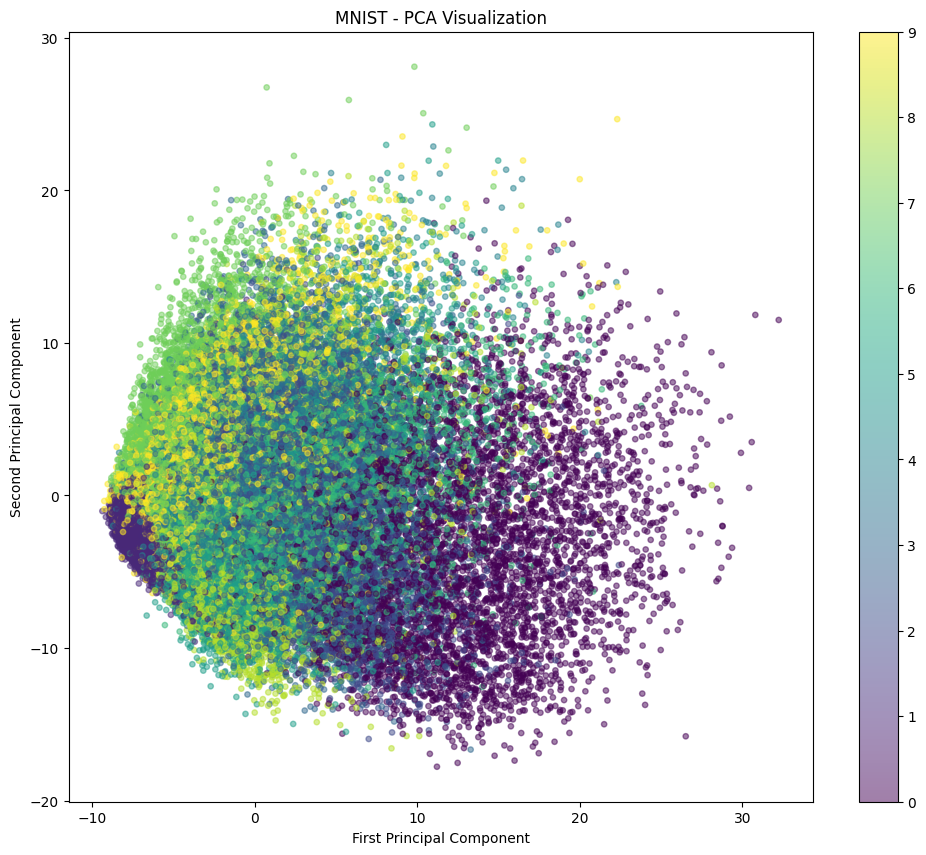

In [20]:
plt.figure(figsize=(12, 10))
plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c=y.astype(int), cmap='viridis', s=15, alpha=0.5)
plt.colorbar()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST - PCA Visualization')
plt.show()

This scatter plot visualization helps you understand the distribution of the data in the first two principal components, which are the dimensions that explain the most variance in the dataset. While the plot may not show perfect clustering for the MNIST dataset, it gives you an idea of how the different digit classes are distributed in the reduced-dimensional space.

#### Conclusion 

By reducing the dimensionality of the dataset from 784 to 331 features, we can simplify the classification problem and speed up the training of the classifier. The training time is significantly can be reduced because the training algorithm only has to deal with 331 features instead of 784 features. In addition the size of the model is also can be reduced, which means that the model will take less memory.

The PCA algorithm is a very useful tool for dimensionality reduction, and it is often used in machine learning applications. It is also used to visualize high-dimensional data by projecting it onto a lower dimensional surface.

#### Further Reading


for more information on PCA, check the scikit-learn documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html